In [1]:
import sys
sys.path.insert(0, '../icenumerics')
import icenumerics as ice
import numpy as np
import matplotlib.pyplot as plt
ureg = ice.ureg

from importlib import reload  
import shakti as sha
reload(sha)

from icenumerics.geometry import ordering 

%load_ext autoreload
%autoreload 2

# Building a Shakti lattice

In this script, I will write the functions in order to generate a shakti lattice. 

In [2]:
torad = np.pi/180

# <Parameters from the Cairo lattice>
a = 19.5458
l = 1.37*a

plaquette_cte = 2*l*np.sin(60*torad)
trap_sep = 10

plaquette_cte, (plaquette_cte-2*20)

(46.38041658417427, 6.38041658417427)

In [3]:
trap_sep = 10
part_d = 13*np.sqrt(2)
plaquette_cte = part_d*2+2*trap_sep

centers = [[0,0,0], # <First plaquette>
           [-plaquette_cte/4, plaquette_cte/2,0],
           [plaquette_cte/4, plaquette_cte/2,0],
           [-plaquette_cte/4, -plaquette_cte/2,0],
           [plaquette_cte/4, -plaquette_cte/2,0],

           [plaquette_cte, 0, 0], # <Second plaquette>
           [plaquette_cte/2,plaquette_cte/4, 0],
           [plaquette_cte/2,-plaquette_cte/4, 0],
           [(3/2)*plaquette_cte,plaquette_cte/4, 0],
           [(3/2)*plaquette_cte,-plaquette_cte/4, 0],

           [0,-plaquette_cte, 0], # <Third plaquette>
           [-plaquette_cte/2, -3/4*plaquette_cte,0],
           [-plaquette_cte/2, -5/4*plaquette_cte,0],
           [+plaquette_cte/2, -3/4*plaquette_cte,0],
           [+plaquette_cte/2, -5/4*plaquette_cte,0],
           
           [plaquette_cte, -plaquette_cte,0], # <Fourth plaquette>
           [3/4*plaquette_cte, -plaquette_cte/2,0],
           [5/4*plaquette_cte, -plaquette_cte/2,0],
           [3/4*plaquette_cte, -3/2*plaquette_cte,0],
           [5/4*plaquette_cte, -3/2*plaquette_cte,0],
          ]*ureg.um


directions = [[0,3*a,0], # <First plaquette>
              [1*a,0,0],
              [1*a,0,0],
              [1*a,0,0],
              [1*a,0,0],
              [3*a,0,0], # <Second plaquette>
              [0,1*a,0],
              [0,1*a,0],
              [0,1*a,0],
              [0,1*a,0],
              [3*a,0,0], #  <Third plaquette>
              [0,1*a,0],
              [0,1*a,0],
              [0,1*a,0],
              [0,1*a,0],
              [0,3*a,0], # <Fourth plaquette>
              [1*a,0,0],
              [1*a,0,0],
              [1*a,0,0],
              [1*a,0,0],
             ]*ureg.um

In [43]:
vertex_centers = np.array([[0, plaquette_cte/2], # 3-fold vertices.
                  [0, -plaquette_cte/2],
                  [plaquette_cte/2,0],
                  [3/2*plaquette_cte,0],
                  [-plaquette_cte/2,-plaquette_cte],
                  [+plaquette_cte/2,-plaquette_cte],
                  [plaquette_cte,-plaquette_cte/2],
                  [plaquette_cte,-3/2*plaquette_cte],
                  [-plaquette_cte/2,plaquette_cte/2], # 4-fold vertices.
                  [plaquette_cte/2, plaquette_cte/2],
                  [-plaquette_cte/2,-plaquette_cte/2],
                  [plaquette_cte/2,-plaquette_cte/2]])

In [44]:
vertex_centers[:,0]

array([  0.        ,   0.        ,  28.38477631,  85.15432893,
       -28.38477631,  28.38477631,  56.76955262,  56.76955262,
       -28.38477631,  28.38477631, -28.38477631,  28.38477631])

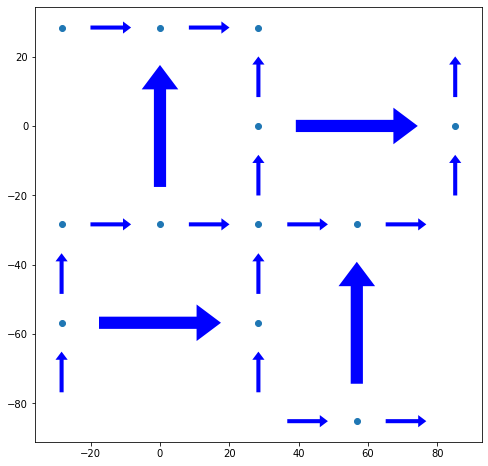

In [45]:
sp = ice.spins(centers = centers, directions = directions)

f, (ax1) = plt.subplots(1,1,figsize = (8,8))
sp.display(ax1)
plt.axis('equal')
ax1.plot(vertex_centers[:,0],vertex_centers[:,1],'o')

## Generalizing 

To implement the shakti lattice we create a shakti.py file with the functions that allow to generate and build the lattice.

In [5]:
output = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-10.0"

In [6]:
sp = sha.spins()
ureg = ice.ureg
sp.create_lattice(geometry = "shakti",size =[2,2],lattice_constant=1*ureg.um , border="periodic")
sp.order_spins(ordering.random_ordering)

/home/carolina/CairoLattice_ACI_PROJECT/Scripts/shakti.py:170: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  new_centers[:,1] = centersY


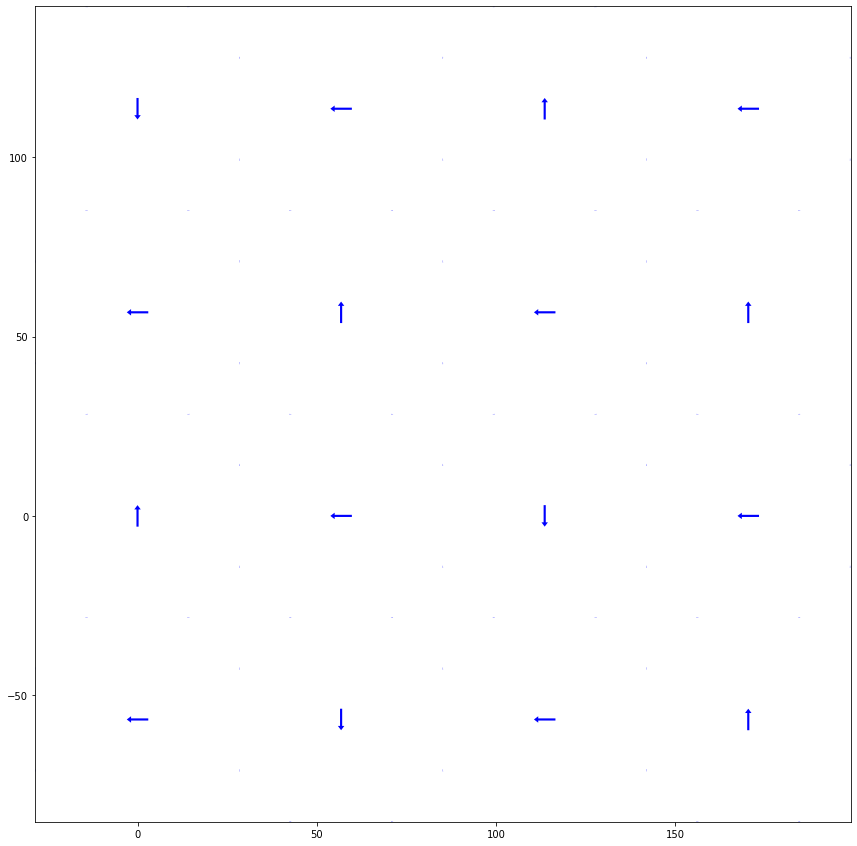

In [7]:
f, (ax1) = plt.subplots(1,1,figsize = (15,15))
sp.display(ax1)

In [8]:
particle = ice.particle(radius = 5*ureg.um,
             susceptibility = 0.005,
             diffusion = 0.125*ureg.um**2/ureg.s,
             temperature = 300*ureg.K,
             density = 1000*ureg.kg/ureg.m**3)

trap_short = ice.trap(trap_sep = 10*ureg.um,
               height = 30*ureg.pN*ureg.nm,
               stiffness = 0.1*ureg.fN/ureg.nm)

trap_long = ice.trap(trap_sep = (20+13*np.sqrt(2))*ureg.um,
               height = 30*ureg.pN*ureg.nm,
               stiffness = 0.1*ureg.fN/ureg.nm)

In [9]:
lattice_constant = 10
traps = []

for s in sp:
    
    if ( s.direction[0].magnitude >= lattice_constant or s.direction[0].magnitude <= -lattice_constant or 
        s.direction[1].magnitude >= lattice_constant or s.direction[1].magnitude <= -lattice_constant):
        
        traps.append(trap_long)
        
    else:
        
        traps.append(trap_short)
        

In [10]:
col = ice.colloidal_ice(sp, particle, traps, height_spread = 0, susceptibility_spread = 0.1)
col.pad_region(5*ureg.um)

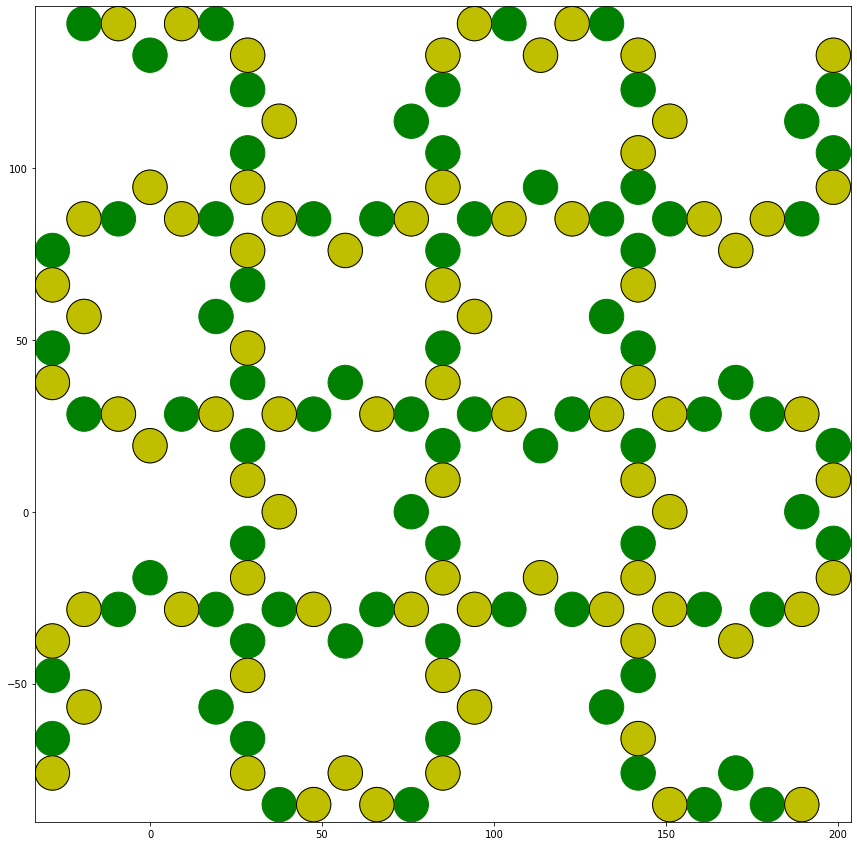

In [11]:
f, (ax1) = plt.subplots(1,1,figsize = (15,15))

col.display(ax1)

In [12]:
world = ice.world(
    field = 0*ureg.mT,
    temperature = 300*ureg.K,
    dipole_cutoff = 200*ureg.um)
#   boundaries = ["p", "p", "p"])

In [13]:

total_time = 10*ureg.s
col.simulate(world,
             name = "shakti_test",
             include_timestamp = False,
             targetdir = output,
             framerate = 1*ureg.Hz,
             timestep = 10*ureg.ms,
             run_time = total_time,
             output = ["x","y","z","mux","muy","muz"])

scanning file


In [14]:
col.sim.field.fieldz = "v_Bmag*time/%f"%(total_time.to(ureg.us).magnitude)
col.run_simulation()

In [15]:
col.load_simulation(slice(0,None,10))

scanning file


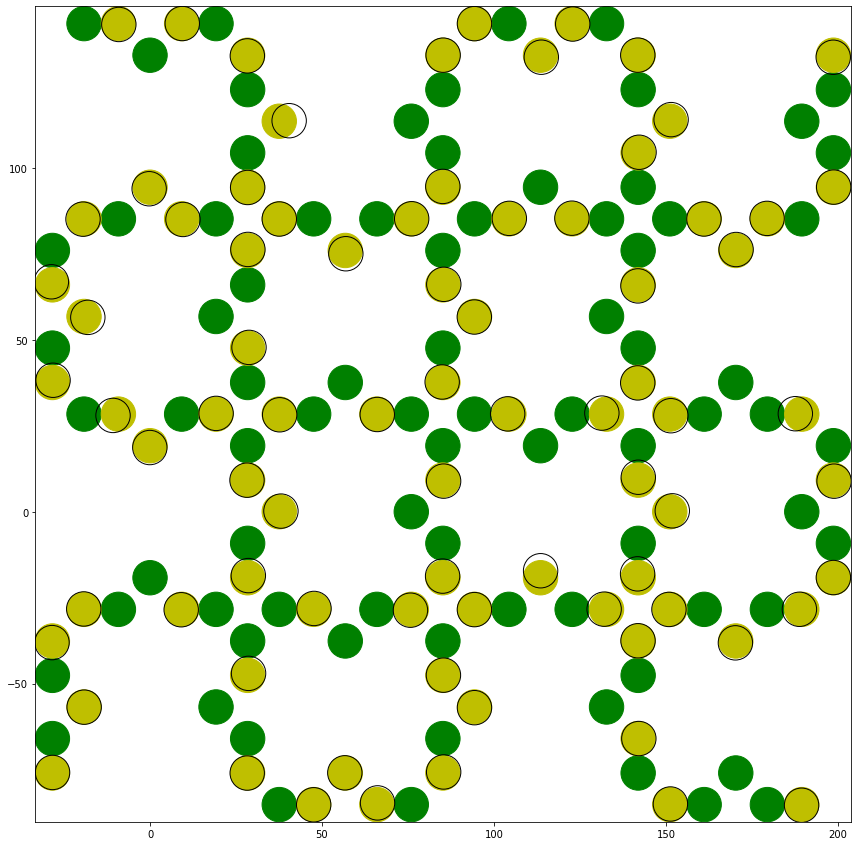

In [16]:
f, (ax1) = plt.subplots(1,1,figsize = (15,15))
v = ice.vertices()
col.set_state_from_frame(-1)

col.display(ax1)

,x,y,coordination,dx,dy
charge,,,,,
-4,1,1,1,1,1
-2,2,2,2,2,2
0,11,11,11,11,11
2,6,6,6,6,6
4,1,1,1,1,1


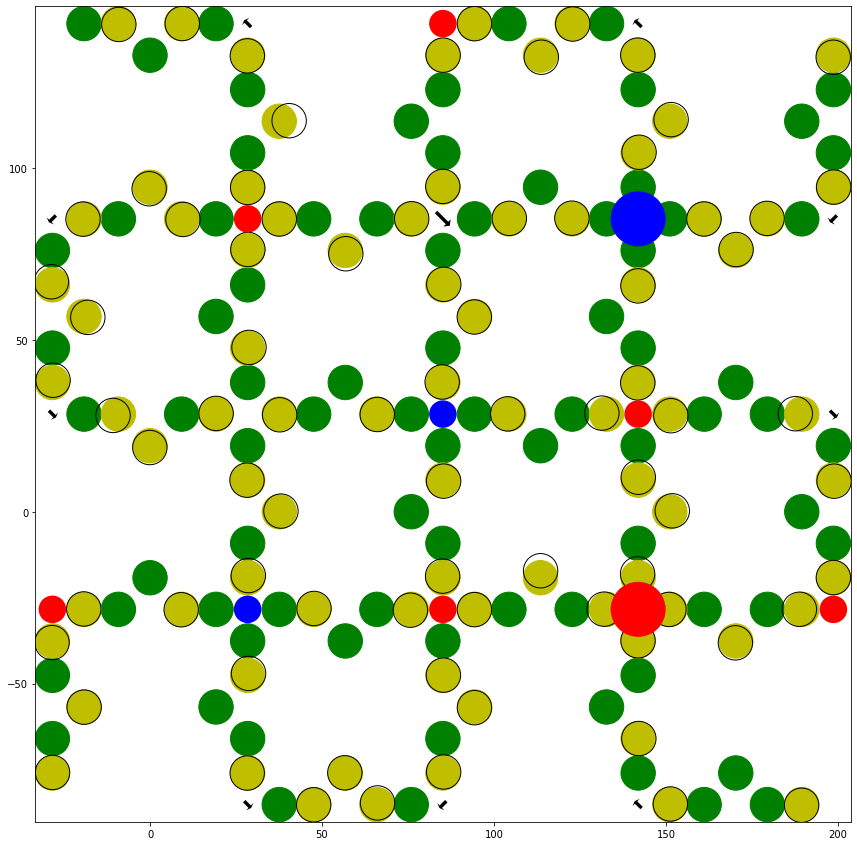

In [17]:
f, (ax1) = plt.subplots(1,1,figsize = (15,15))
v = ice.vertices()
col.set_state_from_frame(-1)
v = v.colloids_to_vertices(col)

col.display(ax1)
v.display(ax1)
v.vertices.groupby('charge').count()

## From here I will try to undestand why 3-coordination vertices are not considered

In [18]:
import scipy.spatial as sptl

def calculate_neighbor_pairs(Centers):
    """This function makes a list of all the Pairs of Delaunay Neighbors from an array of points"""
    
    tri = sptl.Delaunay(Centers)

    # List all Delaunay neighbors in the system
    NeighborPairs = np.array(np.zeros(2*np.shape(tri.simplices)[0]),
                             dtype=[('Pair',np.int,(2,)),('Distance',np.float),('Vertex',np.float,(2,))])

    i = 0
    for t in tri.simplices:
        NeighborPairs[i]['Pair'] = np.sort(t[0:2])
        NeighborPairs[i]['Distance'] = sptl.distance.euclidean(Centers[t[0]],Centers[t[1]])
        NeighborPairs[i+1]['Pair'] = np.sort(t[1:3])
        NeighborPairs[i+1]['Distance'] = sptl.distance.euclidean(Centers[t[1]],Centers[t[2]])
        i = i+2
    
    return NeighborPairs

In [19]:
spins = ice.ice_to_spins(col)
NeighborPairs = calculate_neighbor_pairs(spins['Center'])

In [20]:
NeighborPairs

array([([65, 69], 31.73514468, [0., 0.]),
       ([68, 69], 28.38477631, [0., 0.]),
       ([65, 69], 31.73514468, [0., 0.]),
       ([65, 77], 31.73514468, [0., 0.]),
       ([29, 37], 20.07106781, [0., 0.]),
       ([37, 39], 56.76955262, [0., 0.]),
       ([35, 37], 31.73514468, [0., 0.]),
       ([35, 39], 31.73514468, [0., 0.]),
       ([51, 52], 28.38477631, [0., 0.]),
       ([50, 52], 31.73514468, [0., 0.]),
       ([ 1, 52], 20.07106781, [0., 0.]),
       ([ 1, 50], 31.73514468, [0., 0.]),
       ([ 1,  2], 28.38477631, [0., 0.]),
       ([ 2, 50], 31.73514468, [0., 0.]),
       ([40, 42], 31.73514468, [0., 0.]),
       ([41, 42], 28.38477631, [0., 0.]),
       ([43, 51], 20.07106781, [0., 0.]),
       ([50, 51], 31.73514468, [0., 0.]),
       ([43, 51], 20.07106781, [0., 0.]),
       ([41, 43], 56.76955262, [0., 0.]),
       ([40, 43], 31.73514468, [0., 0.]),
       ([40, 41], 31.73514468, [0., 0.]),
       ([65, 76], 31.73514468, [0., 0.]),
       ([76, 77], 28.38477631, [0.

In [21]:
spins[65], spins[69], spins[68]

(([170.30865787, 113.53910524], [-1., -0.]),
 ([198.69343418,  99.34671709], [-0., -1.]),
 ([198.69343418, 127.7314934 ], [0., 1.]))

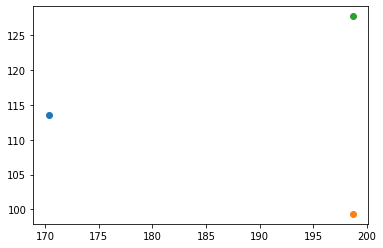

In [22]:
plt.plot(spins[65][0][0],spins[65][0][1],'o')
plt.plot(spins[69][0][0],spins[69][0][1],'o')
plt.plot(spins[68][0][0],spins[68][0][1],'o')

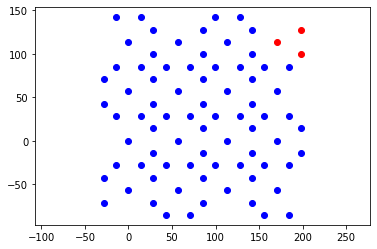

In [23]:
for i in range(0,len(spins)):
    
    if (i == 69 or i == 65 or i == 68):
        
        plt.plot(spins[i][0][0],spins[i][0][1],'o', color = 'red')
    
    else:    
    
        plt.plot(spins[i][0][0],spins[i][0][1],'o', color = 'blue')
        
    plt.axis('equal')
    

### Calculate neighbor pairs seems to work!

In [24]:
def from_neighbors_get_nearest_neighbors(NeighborPairs):
    
    # This function takes a list of Delaunay Neighbor Pairs and returns only those which are close to the minimum distance.
    NeighborPairs['Distance']=np.around(NeighborPairs['Distance'],decimals=4)
    #print(NeighborPairs['Distance'])
    NeighborPairs = NeighborPairs[NeighborPairs['Distance']<= np.min(NeighborPairs['Distance'])*1.1]
    #NeighborPairs = NeighborPairs[NeighborPairs['Distance']<=31.7351] # Include 3-coordination vertices

    return NeighborPairs

In [25]:
NeighborPairs = from_neighbors_get_nearest_neighbors(NeighborPairs)
NeighborPairs

array([([29, 37], 20.0711, [0., 0.]), ([ 1, 52], 20.0711, [0., 0.]),
       ([43, 51], 20.0711, [0., 0.]), ([43, 51], 20.0711, [0., 0.]),
       ([73, 76], 20.0711, [0., 0.]), ([ 3, 11], 20.0711, [0., 0.]),
       ([ 2, 54], 20.0711, [0., 0.]), ([34, 38], 20.0711, [0., 0.]),
       ([74, 78], 20.0711, [0., 0.]), ([33, 36], 20.0711, [0., 0.]),
       ([42, 46], 20.0711, [0., 0.]), ([44, 53], 20.0711, [0., 0.]),
       ([44, 47], 20.0711, [0., 0.]), ([47, 56], 20.0711, [0., 0.]),
       ([62, 66], 20.0711, [0., 0.]), ([49, 57], 20.0711, [0., 0.]),
       ([26, 78], 20.0711, [0., 0.]), ([23, 31], 20.0711, [0., 0.]),
       ([24, 33], 20.0711, [0., 0.]), ([ 8, 21], 20.0711, [0., 0.]),
       ([ 2,  6], 20.0711, [0., 0.]), ([ 4,  7], 20.0711, [0., 0.]),
       ([54, 58], 20.0711, [0., 0.]), ([59, 72], 20.0711, [0., 0.]),
       ([57, 71], 20.0711, [0., 0.]), ([53, 56], 20.0711, [0., 0.]),
       ([67, 76], 20.0711, [0., 0.]), ([ 4, 13], 20.0711, [0., 0.]),
       ([13, 16], 20.0711, [0., 0.

In [26]:
def get_vertices_positions(NeighborPairs,spins):
    # From a list of Spins, get neighboring spins, and get the crossing point of each, which defines a vertex.  
    for i,n in enumerate(NeighborPairs):
        NeighborPairs[i]['Vertex'] = spin_crossing_point(spins[n['Pair'][0]],spins[n['Pair'][1]])[0:2]
            
    return NeighborPairs

In [34]:
def spin_crossing_point(S1,S2):
    # This works well in 2d. In 3d it's triciker
    if not (S1['Direction']==S2['Direction']).all():
        A = np.ones([2,2])
        
        print(A)
        A[:,0] = S1['Direction']
        A[:,1] = -S2['Direction']
        
        print(A)

        b = np.array([
            S2['Center'][0]-S1['Center'][0],
            S2['Center'][1]-S1['Center'][1]])
        
        print('b')
        print(b)

        lam = np.linalg.solve(A,b)

        print('return')
        print(S1['Center']+lam[0]*S1['Direction'])
        
        return S1['Center']+lam[0]*S1['Direction']
    else:
        return np.Inf+np.zeros(np.shape(S1['Center']))

In [35]:
for i,n in enumerate(NeighborPairs):
    
    if i == 1:
            
            S1 = spins[n['Pair'][0]]
            S2 = spins[n['Pair'][1]]
    else:
        pass

In [36]:
S1, S2

(([-14.19238816,  28.38477631], [1., 0.]),
 ([-28.38477631,  42.57716447], [-0., -1.]))

In [37]:
spin_crossing_point(S1,S2)

[[1. 1.]
 [1. 1.]]
[[1. 0.]
 [0. 1.]]
b
[-14.19238816  14.19238816]
return
[-28.38477631  28.38477631]


array([-28.38477631,  28.38477631])

In [31]:
NeighborPairs = get_vertices_positions(NeighborPairs,spins)
NeighborPairs

[[1. 1.]
 [1. 1.]]
[[-0. -1.]
 [-1. -0.]]
b
[-14.19238816 -14.19238816]
lam
[14.19238816 14.19238816]
[198.69343418 -28.38477631]
[[1. 1.]
 [1. 1.]]
[[1. 0.]
 [0. 1.]]
b
[-14.19238816  14.19238816]
lam
[-14.19238816  14.19238816]
[-28.38477631  28.38477631]
[[1. 1.]
 [1. 1.]]
[[-1.  0.]
 [-0.  1.]]
b
[-14.19238816 -14.19238816]
lam
[ 14.19238816 -14.19238816]
[-28.38477631  85.15432893]
[[1. 1.]
 [1. 1.]]
[[-1.  0.]
 [-0.  1.]]
b
[-14.19238816 -14.19238816]
lam
[ 14.19238816 -14.19238816]
[-28.38477631  85.15432893]
[[1. 1.]
 [1. 1.]]
[[-0. -1.]
 [-1. -0.]]
b
[14.19238816 14.19238816]
lam
[-14.19238816 -14.19238816]
[141.92388155  85.15432893]
[[1. 1.]
 [1. 1.]]
[[-1. -0.]
 [-0. -1.]]
b
[-14.19238816 -14.19238816]
lam
[14.19238816 14.19238816]
[-28.38477631 -28.38477631]
[[1. 1.]
 [1. 1.]]
[[ 1. -0.]
 [ 0. -1.]]
b
[14.19238816 14.19238816]
lam
[ 14.19238816 -14.19238816]
[28.38477631 28.38477631]
[[1. 1.]
 [1. 1.]]
[[0. 1.]
 [1. 0.]]
b
[ 14.19238816 -14.19238816]
lam
[-14.19238816  14.

array([([29, 37], 20.0711, [198.69343418, -28.38477631]),
       ([ 1, 52], 20.0711, [-28.38477631,  28.38477631]),
       ([43, 51], 20.0711, [-28.38477631,  85.15432893]),
       ([43, 51], 20.0711, [-28.38477631,  85.15432893]),
       ([73, 76], 20.0711, [141.92388155,  85.15432893]),
       ([ 3, 11], 20.0711, [-28.38477631, -28.38477631]),
       ([ 2, 54], 20.0711, [ 28.38477631,  28.38477631]),
       ([34, 38], 20.0711, [141.92388155, -85.15432893]),
       ([74, 78], 20.0711, [141.92388155,  28.38477631]),
       ([33, 36], 20.0711, [141.92388155, -28.38477631]),
       ([42, 46], 20.0711, [ 28.38477631, 141.92388155]),
       ([44, 53], 20.0711, [ 28.38477631,  85.15432893]),
       ([44, 47], 20.0711, [ 28.38477631,  85.15432893]),
       ([47, 56], 20.0711, [ 28.38477631,  85.15432893]),
       ([62, 66], 20.0711, [141.92388155, 141.92388155]),
       ([49, 57], 20.0711, [ 85.15432893,  85.15432893]),
       ([26, 78], 20.0711, [141.92388155,  28.38477631]),
       ([23, 3

In [32]:
NeighborPairs[['Vertex']]

array([([198.69343418, -28.38477631],), ([-28.38477631,  28.38477631],),
       ([-28.38477631,  85.15432893],), ([-28.38477631,  85.15432893],),
       ([141.92388155,  85.15432893],), ([-28.38477631, -28.38477631],),
       ([ 28.38477631,  28.38477631],), ([141.92388155, -85.15432893],),
       ([141.92388155,  28.38477631],), ([141.92388155, -28.38477631],),
       ([ 28.38477631, 141.92388155],), ([ 28.38477631,  85.15432893],),
       ([ 28.38477631,  85.15432893],), ([ 28.38477631,  85.15432893],),
       ([141.92388155, 141.92388155],), ([ 85.15432893,  85.15432893],),
       ([141.92388155,  28.38477631],), ([ 85.15432893, -28.38477631],),
       ([141.92388155, -28.38477631],), ([ 85.15432893,  28.38477631],),
       ([ 28.38477631,  28.38477631],), ([ 28.38477631, -28.38477631],),
       ([ 28.38477631,  28.38477631],), ([ 85.15432893,  28.38477631],),
       ([ 85.15432893,  85.15432893],), ([ 28.38477631,  85.15432893],),
       ([141.92388155,  85.15432893],), ([ 28.38477

## Vertices positions

(-39.738686835190336, 210.04734470029177, -96.5082394568908, 153.2777920785913)

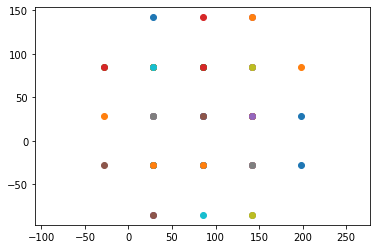

In [33]:
for i,n in enumerate(NeighborPairs):
    
    plt.plot(NeighborPairs[i]['Vertex'][0],NeighborPairs[i]['Vertex'][1],'o')
    
plt.axis('equal')